# Recolhendo os dados

## Importações

Importando biblioteca tweepy, por onde será acessada a API do Twitter. Também importando as biblioteca pandas, onde serão armazenados as informações coletadas do Twitter.

In [1]:
import re

In [2]:
import tweepy as tw
import pandas as pd

# Pacote com dicionário com chaves do twitter
import utils

## Acessando API do Twitter

Lendo arquivo .txt com as chaves para acessar a API do Twitter e em seguida acessando a API.

In [3]:
with open('twitter-tokens.txt','r') as tfile:
    consumer_key = tfile.readline().strip('\n')
    consumer_secret = tfile.readline().strip('\n')
    access_token = tfile.readline().strip('\n')
    access_token_secret = tfile.readline().strip('\n')

In [4]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tw.API(auth)

## Recuperando os Tweets

Definindo os termos de buscas, idioma e quantidade dos tweets recuperados assim como filtrando para não recuperar retweets.

In [5]:
query_search = 'covid' + '-filter:retweets'

cursor_tweets = tw.Cursor(api.search,
                  q=query_search,
                  lang='pt',tweet_mode='extended').items(10)

Recuperando o dicionário previamente criado com o as informações que serão recolhidas dos tweets recuperados.

In [6]:
tweets_dict = utils.tw_dict.copy()
tweets_dict

{'created_at': [],
 'id': [],
 'id_str': [],
 'full_text': [],
 'entities': [],
 'source': [],
 'user': [],
 'lang': []}

Recuperando os tweets através do cursor criado anteriormente e salvando-as no dicionário.

In [7]:
tweets_dict

{'created_at': [],
 'id': [],
 'id_str': [],
 'full_text': [],
 'entities': [],
 'source': [],
 'user': [],
 'lang': []}

In [8]:
for tweet in cursor_tweets:
    for key in tweets_dict.keys():
        try:
            # para cada tweet recuperado tenta salva-lo no dicíonario em sua respectiva chave
            tw_from_key = tweet._json[key]
            # usa expressão regular para remover links dos tweets
            if key == 'full_text':
                tw_from_key = re.sub(r"http\S+", "", tw_from_key)
            tweets_dict[key].append(tw_from_key)
        except KeyError:
            # caso algum tweet recuperado não tenha algum dos dados procurados adiciona uma string vazia
            tw_from_key = ''
            tweets_dict[key].append('')        

In [23]:
#tweet._json

Salvando os dados do dicionário em um dataframe.

In [9]:
tw_df = pd.DataFrame.from_dict(tweets_dict)
tw_df.head()

,created_at,id,id_str,full_text,entities,source,user,lang
0,Sun Sep 06 18:54:41 +0000 2020,1302681646601302016,1302681646601302016,onde que saiu a matéria falando que na praia n...,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 929141625464516609, 'id_str': '92914162...",pt
1,Sun Sep 06 18:54:41 +0000 2020,1302681646458699776,1302681646458699776,@ciclonexplosivo Pega uma Covid e perde o celu...,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...","{'id': 1007598683247005697, 'id_str': '1007598...",pt
2,Sun Sep 06 18:54:40 +0000 2020,1302681641022902275,1302681641022902275,do nada todo mundo esqueceu o covid e tá desce...,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...","{'id': 904663705, 'id_str': '904663705', 'name...",pt
3,Sun Sep 06 18:54:39 +0000 2020,1302681638439202817,1302681638439202817,covid podia acabar aqui em maringa tb\nto doid...,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo...","{'id': 974127835475533824, 'id_str': '97412783...",pt
4,Sun Sep 06 18:54:38 +0000 2020,1302681633519267851,1302681633519267851,"litoral paulista tá lotado, consigo ver daqui ...","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...","{'id': 1156666753499443200, 'id_str': '1156666...",pt


In [26]:
teste = tw_df.iloc[1].full_text
teste

'@ciclonexplosivo Pega uma Covid e perde o celular.'

In [29]:
re.sub(r"@\S+", "", teste)

' Pega uma Covid e perde o celular.'

# Visualizando os dados

## Importações

Importando algumas bibliotecas que ajudarão na visualização dos dados.

In [30]:
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords

In [33]:
all_summary

'onde que saiu a matéria falando que na praia ninguém pega covid??? @ciclonexplosivo Pega uma Covid e perde o celular. do nada todo mundo esqueceu o covid e tá descendo pra praia covid podia acabar aqui em maringa tb\nto doidinho pra matar uma marvada black com o com ele e elas litoral paulista tá lotado, consigo ver daqui do interior a nuvem formada pelo COVID-19 gente a vacina pra covid tá dando na praia ou no shopping? aquela dupla famosa...a covid e a 19 "Todo mundo já pegou a Covid" é desculpa pra irresponsabilidade. Amazonas viveu caos no início da Pandemia. Parecia que pior tinha passado. Hoje tem aparecido em alta de novo. Não é "onda 2". Vírus ainda circulava e + contato social e relaxamento de cuidados aumentaram contágio. @UOLNoticias Mentira esse cara (Eduardo bolsnaro)como o pai dele e os outros não contrairam o COVID ,pq vírus não se junta com BACTÉRIA e vice e versa. o tanto de gente que tinha aqui meu deus covid eh seu dever me pegar'

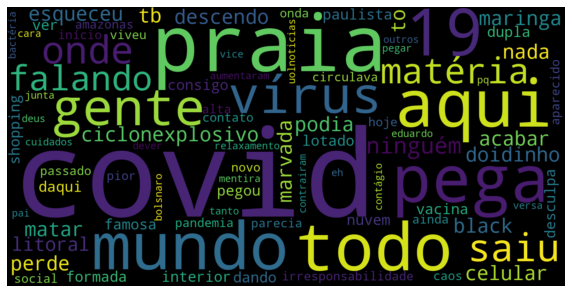

In [34]:
# Concatenando todas as letras em uma única string.
all_summary = " ".join(s for s in list(tw_df['full_text']))

# Criando lista de stopwords e adicionando algumas palavras à ela.
stopwords_pt = stopwords.words('portuguese')
stopwords_pt.extend(['pra','tá','https'])

# Gerando uma wordcloud.
wordcloud = WordCloud(stopwords=stopwords_pt, background_color="black", 
                      width=1600, height=800, collocations=False).generate(all_summary.lower())

# Mostrando a imagem final.
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

In [37]:
from textblob import TextBlob as tb
import numpy as np

In [38]:
wordcloud.words_

{'covid': 1.0,
 'praia': 0.3,
 'pega': 0.2,
 'todo': 0.2,
 'mundo': 0.2,
 'aqui': 0.2,
 '19': 0.2,
 'gente': 0.2,
 'vírus': 0.2,
 'onde': 0.1,
 'saiu': 0.1,
 'matéria': 0.1,
 'falando': 0.1,
 'ninguém': 0.1,
 'ciclonexplosivo': 0.1,
 'perde': 0.1,
 'celular': 0.1,
 'nada': 0.1,
 'esqueceu': 0.1,
 'descendo': 0.1,
 'podia': 0.1,
 'acabar': 0.1,
 'maringa': 0.1,
 'tb': 0.1,
 'to': 0.1,
 'doidinho': 0.1,
 'matar': 0.1,
 'marvada': 0.1,
 'black': 0.1,
 'litoral': 0.1,
 'paulista': 0.1,
 'lotado': 0.1,
 'consigo': 0.1,
 'ver': 0.1,
 'daqui': 0.1,
 'interior': 0.1,
 'nuvem': 0.1,
 'formada': 0.1,
 'vacina': 0.1,
 'dando': 0.1,
 'shopping': 0.1,
 'dupla': 0.1,
 'famosa': 0.1,
 'pegou': 0.1,
 'desculpa': 0.1,
 'irresponsabilidade': 0.1,
 'amazonas': 0.1,
 'viveu': 0.1,
 'caos': 0.1,
 'início': 0.1,
 'pandemia': 0.1,
 'parecia': 0.1,
 'pior': 0.1,
 'passado': 0.1,
 'hoje': 0.1,
 'aparecido': 0.1,
 'alta': 0.1,
 'novo': 0.1,
 'onda': 0.1,
 'ainda': 0.1,
 'circulava': 0.1,
 'contato': 0.1,
 'soci